# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import requests
from scipy import stats
import numpy as np

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus
...,...,...,...,...,...,...,...,...,...,...,...
12012,0.093260,-0.087108,-2.268081,-0.164963,0.261718,0.148790,0.333428,0.587587,0.219991,0.072596,Marcus
12013,-0.215336,0.101320,0.235627,-0.280585,0.261718,-1.719828,-0.308329,1.008086,-0.154186,-1.302496,Philippus
12014,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.224934,0.333428,0.664239,0.687713,-0.224659,Marcus
12015,0.266074,0.580242,0.114709,-0.165469,0.261718,0.024215,0.446679,0.428536,0.375899,-0.103698,Marcus


#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389
...,...,...,...,...,...,...,...,...,...,...
8007,0.006853,0.407516,0.274747,-0.083803,0.261718,-0.391033,-0.157328,0.047120,0.251173,-0.156391
8008,-0.042522,-0.463965,0.392108,0.226990,0.261718,1.228436,0.597681,-0.447720,0.500624,0.879145
8009,-0.042522,0.187683,0.224957,0.290963,0.261718,-0.930856,0.144676,0.762539,0.032902,-0.798507
8010,0.130292,0.077766,0.299642,-0.693335,0.261718,0.190314,0.257927,1.172962,0.469443,0.155174


#### Sample submission

In [6]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [7]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

## FEATURES EXTRACTION

In [8]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [9]:
# First of all, I will label the monks´s names column

monks={
    'Marcus':1, 'Clarius':2, 'Philippus':3, 'Coronavirucus':4, 'Mongucus':5,
       'Paithonius':6, 'Ubuntius':7, 'Esequlius':8}


def getlabels(column):
    for k,v in monks.items():
        if k in column:
            return v



In [10]:
train_dataset["monks"]=train_dataset["10"].apply(getlabels)

In [11]:
# Now I'm able to drop the tenth column

train_dataset.drop(columns=["10"],inplace=True)


In [12]:
train_dataset.head(4)

,0,1,2,3,4,5,6,7,8,9,monks
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,1
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,2
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,3
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,3


In [13]:
# Not null values

train_dataset.dtypes.isnull().sum()


0

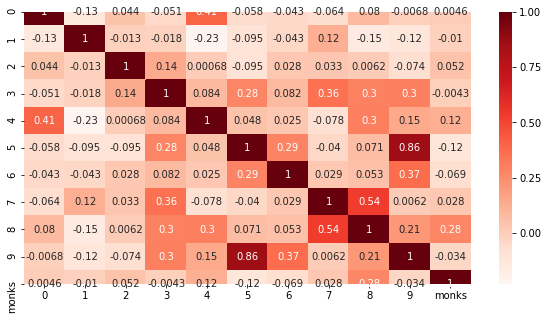

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
cor = train_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# CORRELATION: Just two variables are highly correlated. I will keep them anyway

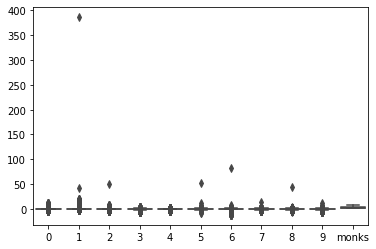

In [15]:
ax = sns.boxplot(data=train_dataset)

plt.show()

# OUTLIERS: There is barely a few outliers

In [16]:
train_dataset["1"].value_counts()

# I clearly see that the value 386 appears just one time so this can make differ the mean. I will remove this point

-0.189174      220
-0.291239      216
-0.220579      189
 0.289748      186
 0.069915      159
              ... 
 16.965662       3
 13.895848       1
 43.133656       1
 386.000000      1
 8.133080        1
Name: 1, Length: 204, dtype: int64

In [17]:
train_dataset=train_dataset.drop(train_dataset[train_dataset["1"]>300].index)

In [18]:
#train_dataset=train_dataset[train_dataset.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

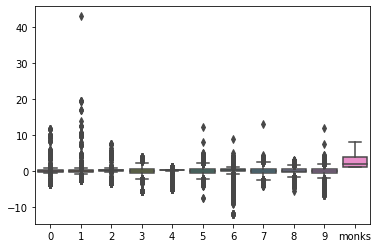

In [19]:
ax = sns.boxplot(data=train_dataset)

plt.show()

In [70]:
test_dataset.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [71]:
test_dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

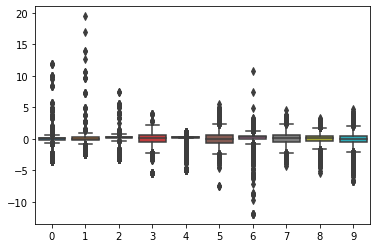

In [72]:
ax = sns.boxplot(data=test_dataset)

plt.show()

In [75]:
X=train_dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
y=train_dataset[['monks']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(9612, 10) (2404, 10) (9612, 1) (2404, 1)


### LOGISTIC REGRESION

In [88]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [89]:
model = LogisticRegression()
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred = model.predict(test_dataset)


### GradientBoostingClassifier() 

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
model=GradientBoostingClassifier(n_estimators=20) 

In [67]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
y_pred = model.predict(X_test)

### LINEAR SVC

In [95]:
from sklearn.svm import LinearSVC

In [96]:
model=LinearSVC()

In [97]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [98]:
y_pred = model.predict(X_test)


In [99]:
y_pred=model.predict(test_dataset)

In [100]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### RANDOM MODELS

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestNeighbors


models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "nbrs": NearestNeighbors(n_neighbors=2, algorithm='ball_tree'),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="poly",gamma="auto", max_iter=200),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100)
}

In [146]:
for name,m  in models.items():
    m.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        print(f"Evaluating model {name}")
        printMetric("Accuracy",accuracy_score(y_test, y_pred))
        printMetric("Precision",precision_score(y_test, y_pred))
        printMetric("Recall",recall_score(y_test, y_pred))
        printMetric("F1Score",f1_score(y_test, y_pred))
    except:
        print("Error")

Evaluating model logis
	 Accuracy: 0.567
Error
Error
Evaluating model svm-linear
	 Accuracy: 0.539
Error
Evaluating model svm-rbf
	 Accuracy: 0.531
Error
Evaluating model randomforest
	 Accuracy: 0.98
Error


## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [ ]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [ ]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)